# <p align=center> Optimiser la gestion des données d'une boutique avec Python <p>

Aujourd’hui est un grand jour, vous commencez votre mission en tant que data analyst freelance chez BottleNeck, un marchand de vin très prestigieux. Votre manager sur cette mission (Laurent) vous accueille chaleureusement et vous propose de partager un petit café avec le reste de l’équipe du service Numérique. L’ambiance est bonne, et vous voilà déjà parfaitement intégré dans cette équipe détendue mais professionnelle.\
\
\
*"Actuellement, pour gérer nos ressources, nos clients, etc., on utilise un ERP qui n’est absolument pas relié à notre site de vente en ligne. Pour être tout à fait honnête, les outils en place sont vraiment artisanaux et dans ces conditions, la gestion des stocks est vraiment complexe et notre visibilité en termes d’analyse des ventes sur le Net est vraiment réduite, car très peu de personnes ont accès au back-office. En attendant une solution plus centralisée, un rapprochement entre les 2 bases, même manuel, pourrait être très utile…"*

# SOMMAIRE<br> <a class="anchor" id="sommaire"></a>

- __[1. Nettoyage des Données](#1-nettoyage-des-données)__<br>
   - [1.1. Base ERP](#11-base-erp)<br>
   - [1.2. Base Web](#12-base_web)<br>
   - [1.3. Base de Liaison](#13-base_liaison)<br>
- __[2. Analyse du chiffre d'affaire](#2-analyse-du-chiffre-daffaire)__<br>
   - [2.1. Liaison des tables](#21-liaison-des-tables)<br>
   - [2.2. Calcul du chiffre d'affaire](#22-calcul-du-chiffre-daffaire)<br>
- __[3. Analyse univariée des Prix](#3-analyse-univariée-de-price)__<br>
   - [3.1. Analyse statistique](#31-analyse-statistique)<br>
   - [3.2. Représentations graphiques](#32-rerpésentations-graphiques)<br>
   - [3.3. Comparons les prix avec un autre site de vins et spiritueux](#33-comparons-les-prix-avec-un-autre-site-de-vins-et-spiritueux)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")


#Enleve la mise en garde suite à l'import xlsx
import warnings
warnings.simplefilter("ignore")

## 1. Nettoyage des Données <a class="anchor" id=" Nettoyage">

**Import des 3 tables qui seront utilisées**

In [2]:
erp = pd.read_excel('erp.xlsx')

liaison = pd.read_excel('liaison.xlsx')

web = pd.read_excel('web.xlsx')

### 1.1. Base ERP <a class="anchor" id="Base_erp"></a>

In [3]:
erp.shape

(825, 5)

In [4]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

**Valeurs Nulles**

In [5]:
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


Pas de valeurs nulles dans la table

**Doublons**

In [6]:
erp.loc[erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


Pas de doublons au niveau de la clé primaire

In [7]:
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


### 1.2. Base Web <a class="anchor" id="Base_web"></a>

In [8]:
web.shape

(1513, 28)

In [9]:
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


**Valeurs Nulles**

In [10]:
print(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


85 valeurs vides au niveau de la clé primaire. 83 au niveau des ventes ('total_sales').

In [11]:
web_sku = web[["sku","total_sales"]]
web_sku_na = web_sku[web_sku.isna().any(axis=1)]
web_sku_na = web_sku_na["total_sales"].dropna()
print(web_sku_na)

470    0.0
471    0.0
Name: total_sales, dtype: float64


Pas de ventes concernant le SKU manquant

**Doublons**

In [12]:
web.loc[web['sku'].duplicated(keep=False),:].sort_values('total_sales',ascending=False)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
993,7818,0,0,0,0.0,96.0,NaN,NaN,2.0,2018-03-01 14:02:44,...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
197,7818,0,0,0,0.0,96.0,taxable,NaN,2.0,2018-03-01 14:02:44,...,champagne-gosset-grand-blanc-de-blanc,2020-08-12 14:00:03,2020-08-12 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
870,1662,0,0,0,0.0,87.0,NaN,NaN,2.0,2018-02-13 13:17:25,...,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
72,1662,0,0,0,0.0,87.0,taxable,NaN,2.0,2018-02-13 13:17:25,...,champagne-gosset-grand-rose,2020-08-14 16:45:03,2020-08-14 14:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
31,16416,0,0,0,0.0,62.0,taxable,NaN,2.0,2018-02-12 13:42:28,...,gilles-robin-crozes-hermitage-papillon-2019,2020-08-27 16:05:04,2020-08-27 14:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Par rapport à la clé primaire de la table, toutes les lignes sont en doublon.

In [13]:
#L'export web contient toutes les lignes en double. Nous choisissons de tenir compte
# uniquement des lignes où post_type = produit et sku non Null
web.drop(web[web['post_type']!='product'].index, inplace=True)
web = web[web['sku'].notnull()]

In [14]:
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


Nous aurons donc 714 lignes à analyser.

### 1.3. Base de Liaison <a class="anchor" id="Base_liaison"></a>

In [15]:
liaison.shape

(825, 2)

In [16]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

**Valeurs nulles**

In [17]:
print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


91 Valeurs nulles au niveau du sku.

**Doublons**

In [18]:
liaison.loc[liaison['product_id'].duplicated(keep=False),:]

,product_id,id_web


Pas de doublons sur les product_id.

In [19]:
liaison.loc[liaison['id_web'].duplicated(keep=False),:]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


91 doublons, correspondants au 91 valeurs manquantes.

In [20]:
liaison.count()

product_id    825
id_web        734
dtype: int64

**Liste des produits sans *id_web***

In [21]:
liaison_na = liaison[liaison.isna().any(axis=1)]
liaison_na = liaison_na[liaison_na["id_web"].isnull()]
print(liaison_na["product_id"].tolist())

[4055, 4090, 4092, 4195, 4209, 4233, 4278, 4279, 4565, 4577, 4578, 4594, 4599, 4659, 4692, 4693, 4697, 4698, 4702, 4721, 4738, 4744, 4798, 4874, 4911, 4973, 5017, 5020, 5070, 5075, 5560, 5569, 5805, 5808, 5952, 6125, 6324, 6327, 6594, 6821, 6824, 6825, 6826, 6864, 6866, 6869, 6875, 6898, 6899, 6900, 6901, 6902, 6903, 6904, 6905, 6906, 6907, 6908, 6909, 7008, 7009, 7010, 7015, 7081, 7084, 7085, 7086, 7087, 7088, 7131, 7132, 7133, 7136, 7137, 7159, 7161, 7162, 7163, 7164, 7168, 7169, 7170, 7192, 7193, 7194, 7195, 7196, 7200, 7201, 7203, 7204]


In [22]:
liaison_na.count()

product_id    91
id_web         0
dtype: int64

Retour au [sommaire](#sommaire)

## 2. Analyse du Chiffre d'Affaire <a class="anchor" id="analyse_ca">

### 2.1. Liaison des tables <a class="anchor" id="liaison_tables"></a>

Liaison externe pour analyse des mismatch

In [23]:
#On renomme l'id_web pour pouvoir lier les tables
liaison.rename(columns={"id_web":"sku"}, inplace=True)

erp_liaison = pd.merge(erp ,liaison, on = 'product_id', how = 'outer')
data = pd.merge(erp_liaison , web, on = 'sku', how ='outer')

data.shape

(825, 33)

In [24]:
print(data.isnull().sum())

product_id                 0
onsale_web                 0
price                      0
stock_quantity             0
stock_status               0
sku                       91
virtual                  111
downloadable             111
rating_count             111
average_rating           111
total_sales              111
tax_status               111
tax_class                825
post_author              111
post_date                111
post_date_gmt            111
post_content             825
post_title               111
post_excerpt             111
post_status              111
comment_status           111
ping_status              111
post_password            825
post_name                111
post_modified            111
post_modified_gmt        111
post_content_filtered    825
post_parent              111
guid                     111
menu_order               111
post_type                111
post_mime_type           825
comment_count            111
dtype: int64


825 lignes, 91 valeurs *'sku'* nulles correspondant aux 91 nulles de la table **liaison**.\
20 nouvelles valeurs nulles pour *'total_sales'*

In [25]:
data = data[data['sku'].notnull()]
data.shape

(734, 33)

In [26]:
data_na = data[(data['total_sales'].isna())]
print(data_na)

     product_id  onsale_web  price  stock_quantity stock_status      sku  \
276        4289           0   22.8               0   outofstock    13771   
318        4568           0   21.5               0   outofstock    15065   
321        4584           0   32.3               0   outofstock    14785   
425        4741           0   12.4               0   outofstock    12601   
459        4864           0    8.3               0   outofstock    15154   
462        4869           0   17.2               0   outofstock    14360   
490        4921           0   13.8               0   outofstock    15608   
491        4922           0   21.5               0   outofstock    15586   
534        5018           0   15.4               0   outofstock    15272   
536        5021           0   17.1               0   outofstock    15630   
584        5505           0   10.1               0   outofstock    14648   
601        5559           0   27.9               3      instock    14715   
607        5

Les 20 Valeurs manquantes correspondent donc à 20 items présents dans la table de **liaison**, ayant dans la table **ERP** la valeur 0 dans la colonne *'onsale_web'* et absents de la table **web**.\
Nous avons donc 825 lignes, avec 111 lignes pouvant être supprimées pour réaliser l'analyse du chiffre d'affaires, soit 714 lignes à analyser .

### 2.2. Calcul du Chiffre d'affaire <a class="anchor" id="calcu_ca"></a>

In [27]:
data['CA']  = data['price']*data['total_sales']

**Chiffre d'Affaire total**

In [28]:
print (f"Le chiffre d'affaire total réalisé par la boutique en ligne est de {round(data['CA'].sum(),2)} €.")

Le chiffre d'affaire total réalisé par la boutique en ligne est de 70568.6 €.


**CA par produit**

Text(0.5, 1.0, 'CA par Produit')

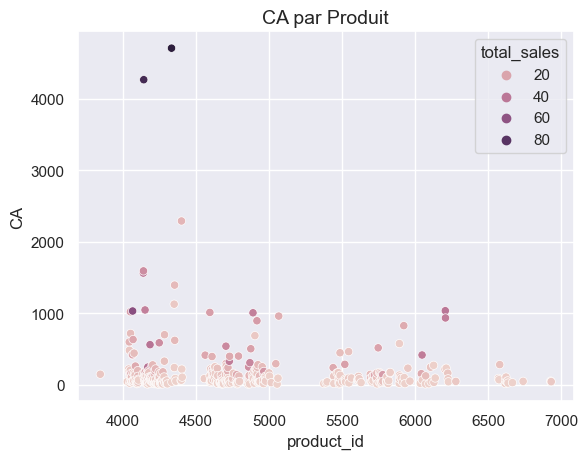

In [29]:
#On sélectionne les produits ayant été vendu au moins 1 fois.
data_ca = data.loc[data['total_sales']>0, ['product_id', 'price', 'total_sales', 'CA']]
sns.scatterplot(x = data_ca['product_id'], y = data_ca['CA'], data = data_ca, hue = 'total_sales')
plt.title("CA par Produit" , fontsize = 14)

In [30]:
data_ca.shape

(385, 4)

*Top 10 des ventes (au niveau du CA)*

In [31]:
data_ca.sort_values('CA', ascending = False).reset_index().head(10)

,index,product_id,price,total_sales,CA
0,286,4334,49.0,96.0,4704.0
1,162,4144,49.0,87.0,4263.0
2,310,4402,176.0,13.0,2288.0
3,161,4142,53.0,30.0,1590.0
4,160,4141,39.0,40.0,1560.0
5,293,4355,126.5,11.0,1391.5
6,291,4352,225.0,5.0,1125.0
7,170,4153,29.0,36.0,1044.0
8,761,6206,25.2,41.0,1033.2
9,121,4068,16.6,62.0,1029.2


*Top 10 des ventes (au niveau du nombre de ventes)*

In [32]:
data_ca.sort_values('total_sales', ascending = False).reset_index().head(10)

,index,product_id,price,total_sales,CA
0,286,4334,49.0,96.0,4704.0
1,162,4144,49.0,87.0,4263.0
2,121,4068,16.6,62.0,1029.2
3,210,4200,5.8,46.0,266.8
4,188,4172,5.7,43.0,245.1
5,200,4187,13.3,42.0,558.6
6,761,6206,25.2,41.0,1033.2
7,160,4141,39.0,40.0,1560.0
8,418,4729,8.6,38.0,326.8
9,734,6047,10.9,38.0,414.2


## 3. Analyse univariée de 'Price'<a class="anchor" id="analyse_uni">

### 3.1. Analyse statistique

Nous choisissons de travailler sur la table ERP qui recense tous les prix.

In [33]:
print(f"Pour le prix, {len(erp['price'])} valeurs sont référencées.")
print(f"La valeur minimale est de {erp['price'].min()} €, la valeur maximale est de {erp['price'].max()} €.")
print(f"La moyenne est de {round(erp['price'].mean(),2)}€ et la médiane de {round(erp['price'].median(),2)}€.")
print(f"le mode est de {erp['price'].mode()}")
print(f"variance empirique : {erp['price'].var()},Variance empirique corrigée : {erp['price'].var(ddof=0)}\necart-type : {erp['price'].std(ddof=0)}, le coefficiant de variation est de {(erp['price'].std()/erp['price'].mean())}") 

Pour le prix, 825 valeurs sont référencées.
La valeur minimale est de 5.2 €, la valeur maximale est de 225.0 €.
La moyenne est de 32.42€ et la médiane de 24.4€.
le mode est de 0    45.0
Name: price, dtype: float64
variance empirique : 718.0175343336275,Variance empirique corrigée : 717.1472100495868
ecart-type : 26.779604366935423, le coefficiant de variation est de 0.8266334462515728


In [34]:
print(f"Skewness : {erp['price'].skew()}, donc la moyenne est plus importante que la médiane.\nkurtosis : {erp['price'].kurtosis()}")

Skewness : 2.6227973685638717, donc la moyenne est plus importante que la médiane.
kurtosis : 10.615358266001198


### 3.2. Rerpésentations graphiques

Text(0.5, 1.0, 'Distribution des prix')

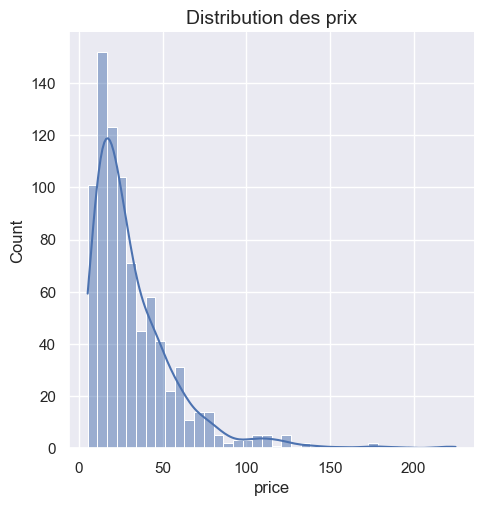

In [35]:
sns.displot(erp, x='price', kde=True)
plt.title("Distribution des prix" , fontsize = 14)

Text(0.5, 1.0, 'Représentation en Boite à Moustaches')

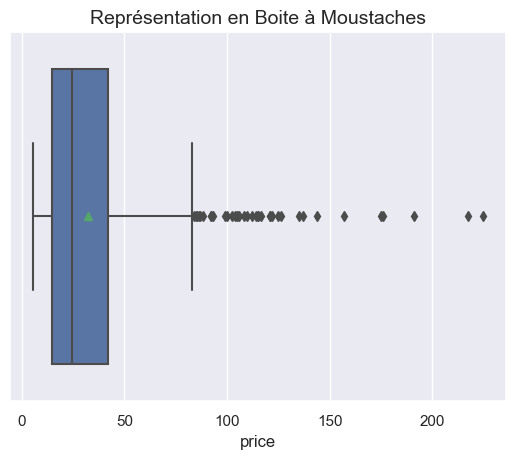

In [36]:
sns.boxplot(erp,x="price",showmeans=True)
plt.title("Représentation en Boite à Moustaches" , fontsize = 14)

**Denombrement des outliers**

In [37]:
q1=erp['price'].quantile(.25)
q3=erp['price'].quantile(.75)
iqr = q3-q1
low_outlier=q1-1.5*iqr
high_outlier=q3+1.5*iqr
print(low_outlier)
print(high_outlier)

-26.499999999999993
83.1


In [38]:
erp[erp["price"]<low_outlier].count()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [39]:
erp[erp['price']>high_outlier].count()

product_id        37
onsale_web        37
price             37
stock_quantity    37
stock_status      37
dtype: int64

In [40]:
print(f"Les outliers sont au nombre de {(len(erp[erp['price']>high_outlier])+len(erp[erp['price']<low_outlier]))}. \nIls représentent {round((len(erp[erp['price']>high_outlier])+len(erp[erp['price']<low_outlier]))/len(erp['price'])*100,2)}% de l'effectif.")

Les outliers sont au nombre de 37. 
Ils représentent 4.48% de l'effectif.


### 3.3. Comparons les prix avec un autre site de vins et spiritueux

In [41]:
from bs4 import BeautifulSoup
import requests
import re
from collections import defaultdict

In [42]:
dict_prices = defaultdict(list)
for page in range(1, 31):
	url = f"https://www.intercaves.fr/e-boutique/page/{page}#"
	page = requests.get(url).text
	doc = BeautifulSoup(page, "html.parser")
	div = doc.find(class_="list-products__products")
	prices = div.find_all(text=re.compile('€'))
	dict_prices['prices'] = [*dict_prices['prices'],*prices]
df_prices = pd.DataFrame.from_dict(dict_prices)
df_prices['prices'] = df_prices['prices'].str.rstrip(' €')
df_prices['prices'] = df_prices['prices'].str.replace(',','.').astype(float)
df_prices.shape

(674, 1)

In [43]:
print(f"Pour le prix, {len(df_prices['prices'])} valeurs sont référencées.")
print(f"La valeur minimale est de {df_prices['prices'].min()} €, la valeur maximale est de {df_prices['prices'].max()} €.")
print(f"La moyenne est de {round(df_prices['prices'].mean(),2)}€ et la médiane de {round(df_prices['prices'].median(),2)}€.")
print(f"le mode est de {df_prices['prices'].mode()}")
print(f"variance empirique : {df_prices['prices'].var()},Variance empirique corrigée : {df_prices['prices'].var(ddof=0)}\necart-type : {df_prices['prices'].std(ddof=0)}, le coefficiant de variation est de {df_prices['prices'].std()/df_prices['prices'].mean()}") 
print(f"Skewness : {df_prices['prices'].skew()}, donc la moyenne est plus importante que la médiane.\nkurtosis : {df_prices['prices'].kurtosis()}")

Pour le prix, 674 valeurs sont référencées.
La valeur minimale est de 3.6 €, la valeur maximale est de 410.0 €.
La moyenne est de 42.73€ et la médiane de 39.9€.
le mode est de 0    49.9
Name: prices, dtype: float64
variance empirique : 885.3769465522639,Variance empirique corrigée : 884.0633309045603
ecart-type : 29.733202499975686, le coefficiant de variation est de 0.6963708150054447
Skewness : 3.9029750366399867, donc la moyenne est plus importante que la médiane.
kurtosis : 38.05454457161448


Text(0.5, 1.0, 'Distribution des prix')

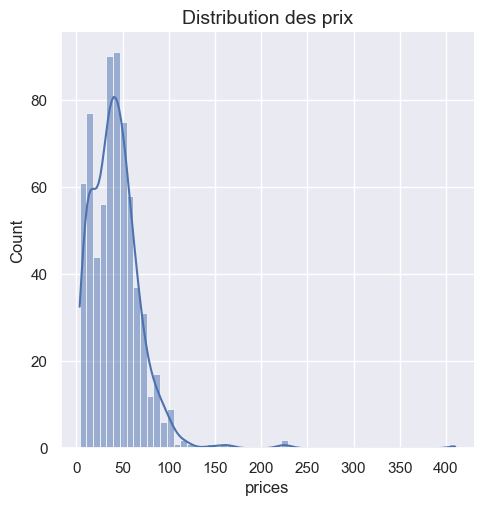

In [44]:
sns.displot(df_prices, x='prices', kde=True)
plt.title("Distribution des prix" , fontsize = 14)

Text(0.5, 1.0, 'Distribution des prix')

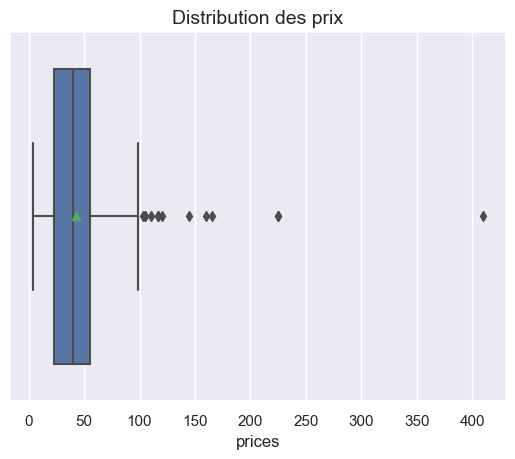

In [45]:
sns.boxplot(df_prices,x="prices",showmeans=True)
plt.title("Distribution des prix" , fontsize = 14)

In [46]:
q1_a=df_prices['prices'].quantile(.25)
q3_a=df_prices['prices'].quantile(.75)
iqr_a = q3_a-q1_a
low_outlier_a=q1_a-1.5*iqr_a
high_outlier_a=q3_a+1.5*iqr_a

print(f"Les outliers sont au nombre de {len(df_prices[df_prices['prices']>high_outlier_a])+len(df_prices[df_prices['prices']<low_outlier_a])}. \nIls représentent {round(((len(df_prices[df_prices['prices']>high_outlier_a])+len(df_prices[df_prices['prices']<low_outlier_a]))/len(df_prices['prices']))*100,2)}% de l'effectif.")

Les outliers sont au nombre de 13. 
Ils représentent 1.93% de l'effectif.


**A voir élément par élément, mais après analyse, il n'y a pas d'erreur apparente au niveau du prix.**